The Zoeppritz equations describe the partitioning of seismic energy at a boundary between two layers of rock. 

In [18]:
import numpy as np
import cmath as cmath
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def energycoeff(a1,a2,b1,b2,p1,p2):
    # Takes the p-wave velocity, s-wave velocity and density for two layers and plots
    # the normalized energy coefficients of the reflected and transmitted p and s waves
    
    # Compute the aucoustic Impedance
    z1s = p1*b1
    z2s = p2*b2
    z1p = p1*a1
    z2p = p2*a2
    
    # Create array of incidence angles between 0 and 90 degrees
    N = 1000
    theta1deg = np.linspace(0.,90.,N)
    theta1 = np.radians(theta1deg)

    #make zero arrays to be filled in later
    ERP = np.zeros(N)
    ERS = np.zeros(N)
    ETP = np.zeros(N)
    ETS = np.zeros(N)

    for i in range(0,N):
        t1 = theta1[i]

        # trig identities
        d1 = np.arcsin(b1/a1*np.sin(t1))
        st2 = a2/a1*np.sin(t1)
        ct2 = cmath.sqrt(1.-st2**2)
        sd2 = b2/a1*np.sin(t1)
        cd2 = cmath.sqrt(1.-sd2**2)

        #double angles
        s2t2 = 2*st2*ct2
        s2d2 = 2*sd2*cd2
        c2d2 = 1.-2*sd2**2

        #Zoepritz equations
        A = np.array([[np.cos(t1), -np.sin(d1), ct2, sd2],
                     [np.sin(t1), np.cos(d1), -st2, cd2],
                     [z1p*np.cos(2*d1), -z1s*np.sin(2*d1), -z2p*c2d2, -z2s*s2d2],
                     [b1/a1*np.sin(2*t1), z1s*np.cos(2*d1), b2/a2*z2s*s2t2, -z2s*c2d2]])

        B = np.array([[np.cos(t1)],
                     [-np.sin(t1)],
                     [-z1p*np.cos(2*d1)],
                     [b1/a1*z1s*np.sin(2*t1)]])

        #Solve the matrix equations
        c = np.linalg.solve(A,B)

        A1 = c[0]
        B1 = c[1]
        A2 = c[2]
        B2 = c[3]

        ERP[i] = np.absolute(A1)**2
        ERS[i] = (b1*np.cos(d1))/(a1*np.cos(t1))*np.absolute(B1)**2
        ETP[i] = (p2*a2*np.real(ct2))/(p1*a1*np.cos(t1))*np.absolute(A2)**2
        ETS[i] = (p2*b2*np.real(cd2))/(p1*a1*np.cos(d1))*np.absolute(B2)**2
            
    fig,ax = plt.subplots(4,1,figsize=(6,6),sharex=False)
    ax[0].plot(theta1deg,ERP)
    ax[0].set_ylabel("$E_{rp}$")
    ax[0].set_ylim(-0.01,1.01)

    ax[1].plot(theta1deg,ETP)
    ax[1].set_ylabel("$E_{tp}$")
    ax[1].set_ylim(-0.01,1.01)

    ax[2].plot(theta1deg,ERS)
    ax[2].set_ylabel("$E_{rs}$")
    ax[2].set_ylim(-0.01,1.01)

    ax[3].plot(theta1deg,ETS)
    ax[3].set_ylabel("$E_{ts}$")
    ax[3].set_ylim(-0.01,1.01)
    ax[3].set_xlabel("Incident Angle $(^\circ$)")

First we examine the case where $\alpha_1 = 2000 m/s$, $\alpha_2 = 4000m/s$, $\beta_1=1070m/s$, $\beta_2=2310m/s$, $\rho_1=2000kg/m^3$, $\rho_2=2500kg/m^3$

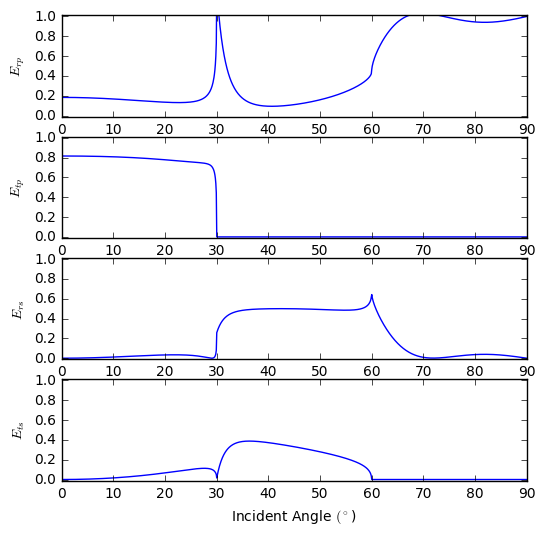

In [20]:
a1, a2 = 2000.,4000.
b1, b2 = 1070.,2310.
p1, p2 = 2000.,2500.

energycoeff(a1,a2,b1,b2,p1,p2)

Now we examine the case where $\alpha_1 = 1480 m/s$, $\alpha_2 = 3300m/s$, $\beta_1=1m/s$, $\beta_2=1300m/s$, $\rho_1=1000kg/m^3$, $\rho_2=900kg/m^3$. This corresponds to ocean acoustic waves incident on sea ice.

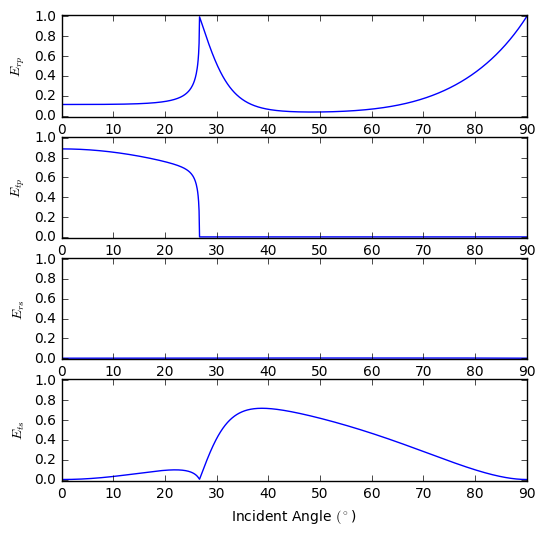

In [21]:
a1, a2 = 1480.,3300.
b1, b2 = 1.,1300.
p1, p2 = 1000.,900.

energycoeff(a1,a2,b1,b2,p1,p2)